In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/sentiment-prediction-on-movie-reviews/movies.csv
/kaggle/input/sentiment-prediction-on-movie-reviews/sample.csv
/kaggle/input/sentiment-prediction-on-movie-reviews/train.csv
/kaggle/input/sentiment-prediction-on-movie-reviews/test.csv


# <u>Glimpse of Movies Dataset

> <h4><b><u>.head()</b></u> displays the first few rows of the DataFrame, allowing us to quickly inspect the data and get an idea of what it looks like. This is often used as a quick way to check the structure and content of a DataFrame when working with large datasets.</h4>

In [2]:
#Glimpse of movies Dataset
movies_data_url='/kaggle/input/sentiment-prediction-on-movie-reviews/movies.csv'
movies_data=pd.read_csv(movies_data_url)
movies_data.head()

,movieid,title,audienceScore,rating,ratingContents,releaseDateTheaters,releaseDateStreaming,runtimeMinutes,genre,originalLanguage,director,boxOffice,distributor,soundType
0,han_solo_heroic_myth_wonder_woman,Han Solo Heroic Myth Wonder Woman,50.0,NaN,NaN,NaN,2018-08-25,75.0,"Comedy, Horror, Sci-fi",English,Claude Nicolet,NaN,NaN,NaN
1,voyage_tyler_durden_han_solo_stardust,Voyage Tyler Durden Han Solo Stardust,NaN,NaN,NaN,NaN,2020-02-11,114.0,Drama,English,Nathan Haack,NaN,NaN,NaN
2,norman_bates_ferris_bueller_hermione_granger_v...,Norman Bates Ferris Bueller Hermione Granger V...,43.0,NaN,NaN,NaN,NaN,120.0,Drama,Korean,Theresa Smith,NaN,NaN,NaN
3,elegant_hermione_granger,Elegant Hermione Granger,60.0,NaN,NaN,NaN,2020-10-23,90.0,"Action, Mystery & thriller",English,Donald Lewis,NaN,NaN,NaN
4,adventure_rocky_balboa,Adventure Rocky Balboa,70.0,NaN,NaN,NaN,2017-03-27,80.0,"Fantasy, Adventure, Animation",English,Howard Simms,NaN,NaN,NaN


> <h4><b><u>.shape</u></b> returns a tuple with two values:</h4>
<h4> 1. The first value in the tuple represents the number of rows in the DataFrame.
 <h4>2. The second value in the tuple represents the number of columns in the DataFrame.

In [3]:
movies_data.shape

(143258, 14)

> <h4><b><u>.describe()</u></b> gives an overview of the central tendency and spread of numerical data in your DataFrame. This is useful for understanding the distribution of data. It's a common step in the exploratory data analysis (EDA) process to gain insights into your dataset.</h4>

In [4]:
movies_data.describe()

,audienceScore,runtimeMinutes
count,73248.000000,129431.000000
mean,55.674967,93.708578
std,24.553648,28.129175
min,0.000000,1.000000
25%,37.000000,84.000000
50%,57.000000,92.000000
75%,76.000000,103.000000
max,100.000000,2700.000000


> <h4><b><u>.info()</u></b> provides various details about the DataFrame, including:
<h4>* The total number of entries (rows) in the DataFrame.
<h4>* The number of non-null entries in each column, which helps identify missing data.
<h4>* The data type of each column (e.g., integer, float, object).
<h4>* The memory usage of the DataFrame.

In [5]:
movies_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 143258 entries, 0 to 143257
Data columns (total 14 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   movieid               143258 non-null  object 
 1   title                 143258 non-null  object 
 2   audienceScore         73248 non-null   float64
 3   rating                13991 non-null   object 
 4   ratingContents        13991 non-null   object 
 5   releaseDateTheaters   30773 non-null   object 
 6   releaseDateStreaming  79420 non-null   object 
 7   runtimeMinutes        129431 non-null  float64
 8   genre                 132175 non-null  object 
 9   originalLanguage      129400 non-null  object 
 10  director              143258 non-null  object 
 11  boxOffice             14743 non-null   object 
 12  distributor           23005 non-null   object 
 13  soundType             15917 non-null   object 
dtypes: float64(2), object(12)
memory usage: 15.3+ MB


>**.isna()** method is used to create a Boolean DataFrame of the same shape as movies_data, where each element is True if the corresponding element in the original DataFrame is missing (NaN or null), and False otherwise.

>**.sum()** method is then called on the Boolean DataFrame created by .isna(). It calculates the sum of True values (which represent missing values) along each column. In other words, it counts the number of missing values in each column.

In [6]:
movies_data.isna().sum()

movieid                      0
title                        0
audienceScore            70010
rating                  129267
ratingContents          129267
releaseDateTheaters     112485
releaseDateStreaming     63838
runtimeMinutes           13827
genre                    11083
originalLanguage         13858
director                     0
boxOffice               128515
distributor             120253
soundType               127341
dtype: int64

# <u>Glimpse of Sample Dataset

In [7]:
#Glimpse of sample Dataset
sample_data_url='/kaggle/input/sentiment-prediction-on-movie-reviews/sample.csv'
sample_data=pd.read_csv(sample_data_url,sep=';')
sample_data.head()

,"id,sentiment"
0,"0,NEGATIVE"
1,"1,NEGATIVE"
2,"2,NEGATIVE"
3,"3,NEGATIVE"
4,"4,NEGATIVE"


In [8]:
sample_data.shape

(55315, 1)

In [9]:
sample_data.describe()

,"id,sentiment"
count,55315
unique,55315
top,"0,NEGATIVE"
freq,1


In [10]:
sample_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 55315 entries, 0 to 55314
Data columns (total 1 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   id,sentiment  55315 non-null  object
dtypes: object(1)
memory usage: 432.3+ KB


# <u>Glimpse of Train Dataset

In [11]:
#Glimpse of train Dataset
train_data_url='/kaggle/input/sentiment-prediction-on-movie-reviews/train.csv'
train_data=pd.read_csv(train_data_url)
train_data.head()

,movieid,reviewerName,isFrequentReviewer,reviewText,sentiment
0,marvelous_pirate,Benjamin Henry,False,Henry Selick’s first movie since 2009’s Corali...,POSITIVE
1,tony_montana_frodo_baggins_v_rocky_balboa,Felicia Lopez,False,With a cast that reads like the Vogue Oscar pa...,NEGATIVE
2,darth_vader_katniss_everdeen_sorcerer_donnie_d...,Mr. Charles Burgess,True,Creed II does not give us anything but another...,POSITIVE
3,lara_croft_glimmer,Ryan Barrett,False,"I know what you're thinking, but this is no Li...",POSITIVE
4,jason_bourne_surreal_the_terminator_indiana_jones,Alexander Glover,False,Director Fernando Meirelles tells the story wi...,POSITIVE


In [12]:
train_data.shape

(162758, 5)

In [13]:
train_data.isna().sum()

movieid                  0
reviewerName             0
isFrequentReviewer       0
reviewText            6447
sentiment                0
dtype: int64

In [14]:
train_data.describe()

,movieid,reviewerName,isFrequentReviewer,reviewText,sentiment
count,162758,162758,162758,156311,162758
unique,16812,4482,2,155071,2
top,escape_the_terminator_tyler_durden_astonish,Sherri Morrison,False,Parental Content Review,POSITIVE
freq,708,962,113189,29,108761


In [15]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 162758 entries, 0 to 162757
Data columns (total 5 columns):
 #   Column              Non-Null Count   Dtype 
---  ------              --------------   ----- 
 0   movieid             162758 non-null  object
 1   reviewerName        162758 non-null  object
 2   isFrequentReviewer  162758 non-null  bool  
 3   reviewText          156311 non-null  object
 4   sentiment           162758 non-null  object
dtypes: bool(1), object(4)
memory usage: 5.1+ MB


# <u>Glimpse of Test Dataset

In [16]:
#Glimpse of test Dataset
test_data_url='/kaggle/input/sentiment-prediction-on-movie-reviews/test.csv'
test_data=pd.read_csv(test_data_url)
test_data.head()

,movieid,reviewerName,isTopCritic,reviewText
0,legend_marty_mcfly_oracle,John Kim,False,Green slowly cranks up the dread with style an...
1,terminator_katniss_everdeen_glimmer,Brian Chaney,False,Philip Noyce's direction is elegant and unforc...
2,james_bond_labyrinth_gollum,Danielle Parker,False,It wouldn't do to say what path Maria ultimate...
3,v_quest_han_solo_wondrous,Brittany Lane,False,Pig is not exactly the arthouse John Wick that...
4,enigma_hulk_surreal_starlight,Justin Willis,False,An imaginative no-budget musical of sorts abou...


In [17]:
test_data.shape

(55315, 4)

In [18]:
test_data.isna().sum()

movieid            0
reviewerName       0
isTopCritic        0
reviewText      2510
dtype: int64

In [19]:
test_data.describe()

,movieid,reviewerName,isTopCritic,reviewText
count,55315,55315,55315,52805
unique,16786,4495,2,52686
top,escape_the_terminator_tyler_durden_astonish,Sherri Morrison,False,Parental Content Review
freq,230,428,38428,12


In [20]:
test_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 55315 entries, 0 to 55314
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   movieid       55315 non-null  object
 1   reviewerName  55315 non-null  object
 2   isTopCritic   55315 non-null  bool  
 3   reviewText    52805 non-null  object
dtypes: bool(1), object(3)
memory usage: 1.3+ MB


> <h3> Importing Necessary Libraries

In [21]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split,GridSearchCV,cross_val_score
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import accuracy_score
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score,classification_report
from sklearn.svm import SVC
import xgboost as xgb
from sklearn.ensemble import RandomForestClassifier
import matplotlib.pyplot as plt
import seaborn as sns
from textblob import TextBlob
from sklearn.pipeline import Pipeline

>Since we have to perform sentiment prediction on the dataset, we have to train the dataset with the columns that play an important role in the analysis. Hence, three columns ('movieid', 'reviewerName', 'isFrequentReviewer') are dropped because they are considered irrelevant for sentiment analysis.

>Missing values in the data frame are filled with empty strings, which suggests that missing reviews are treated as empty reviews.

>The dataset is split into training and testing sets to evaluate the performance of a sentiment analysis model.

In [22]:
train_df=train_data.drop(['movieid','reviewerName','isFrequentReviewer'],axis=1)
train_df=train_df.fillna('')
x=train_df['reviewText']
y=train_df['sentiment']
X_train,X_test,y_train,y_test= train_test_split(x,y,test_size=0.2,random_state=42)

<h3>Calculate sentiment scores using TextBlob

>The code's primary purpose is to perform sentiment analysis on text reviews. It uses the TextBlob library, which is a simple tool for extracting sentiment information from text data. The sentiment score represents the polarity of sentiment, with positive scores indicating positive sentiment, negative scores indicating negative sentiment, and scores close to zero indicating neutral sentiment.

In [23]:
# Calculate sentiment scores using TextBlob
def calculate_sentiment(review):
    blob = TextBlob(review)
    sentiment_score = blob.sentiment.polarity
    return sentiment_score

train_df['Sentiment_Score'] = x.apply(calculate_sentiment)

print(train_df['Sentiment_Score'])

0         0.250000
1         0.000000
2         0.500000
3         0.284091
4        -0.062500
            ...   
162753    0.712500
162754    0.125000
162755    0.220000
162756    0.216667
162757    0.000000
Name: Sentiment_Score, Length: 162758, dtype: float64


<h3>Calculating the Interquartile Range (IQR)

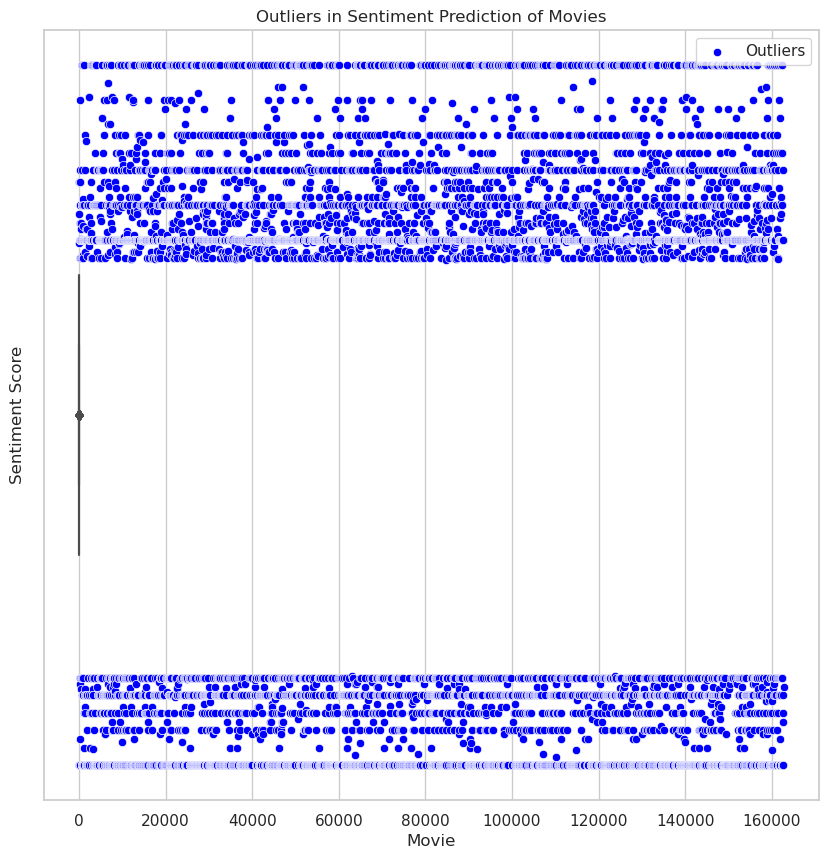

In [24]:
# Calculating the Interquartile Range (IQR)
Q1 = train_df['Sentiment_Score'].quantile(0.25)
Q3 = train_df['Sentiment_Score'].quantile(0.75)
IQR = Q3 - Q1

# Doutlier boundaries
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Finding outliers
outliers = train_df[(train_df['Sentiment_Score'] < lower_bound) | (train_df['Sentiment_Score'] > upper_bound)]

# Setting up the plot
plt.figure(figsize=(10, 10))
sns.set(style="whitegrid")

# Creating a box plot to visualize outliers
sns.boxplot(x=train_df['Sentiment_Score'])

# Highlighting outliers
sns.scatterplot(x=outliers.index, y=outliers['Sentiment_Score'], color='blue', marker='o', label='Outliers')

# Adding labels and title
plt.xlabel("Movie")
plt.ylabel("Sentiment Score")
plt.title("Outliers in Sentiment Prediction of Movies")

# Showing the plot
plt.legend()
plt.show()

<h3>Counting the number of each sentiment

POSITIVE    108761
NEGATIVE     53997
Name: sentiment, dtype: int64


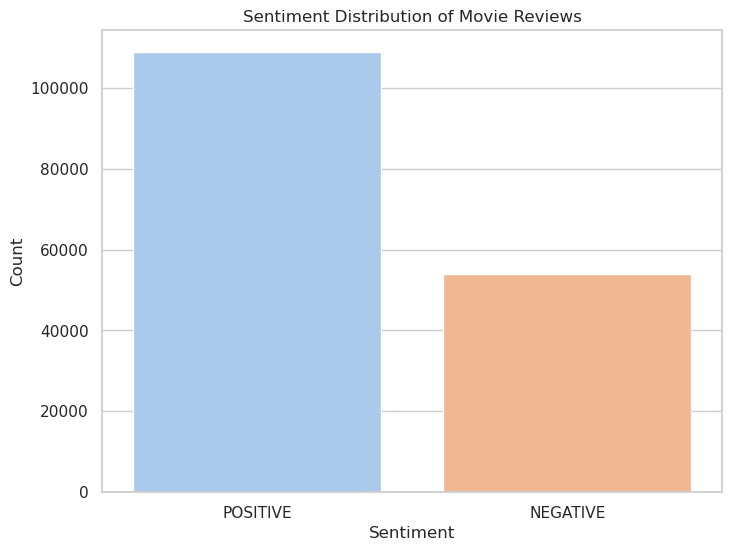

In [25]:
# Counting the number of each sentiment
sentiment_counts = y.value_counts()
print(sentiment_counts)

# Setting up the plot
plt.figure(figsize=(8, 6))
sns.set(style="whitegrid")
sns.barplot(x=sentiment_counts.index, y=sentiment_counts.values, palette="pastel")

# Adding labels and title
plt.xlabel("Sentiment")
plt.ylabel("Count")
plt.title("Sentiment Distribution of Movie Reviews")

# Showing the plot
plt.show()

<h2>Model 4

>The code essentially trains two different machine learning models (Random Forest and XGBoost) on TF-IDF vectorized text data and combines their predictions through majority voting to create an ensemble model. The ensemble's accuracy is then calculated as a measure of its performance.

This code emphasizes creating an ensemble from two models and evaluating their combined performance,

In [26]:
'''
# Loading and preprocessing data
data = pd.read_csv('/kaggle/input/sentiment-prediction-on-movie-reviews/train.csv')
data = data.dropna(subset=['sentiment'])  # Drop rows with missing sentiment values

y_str = data['sentiment']

# Maping string labels to numeric labels
label_map = {'NEGATIVE': 0, 'POSITIVE': 1}
y = y_str.map(label_map)

X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

# Creating a TF-IDF vectorizer
vectorizer = TfidfVectorizer(max_features=5000)
X_train_tfidf = vectorizer.fit_transform(X_train)
X_test_tfidf = vectorizer.transform(X_test)


# Creating a Random Forest classifier with regularization
rf_classifier = RandomForestClassifier(
    n_estimators=500,
    max_depth=10,
    random_state=42
)

rf_classifier.fit(X_train_tfidf, y_train)

# Creating a XGBoost classifier with regularization
xgb_classifier = xgb.XGBClassifier(
    n_estimators=1000,
    max_depth=3,
    learning_rate=0.5,
    reg_alpha=0.1,  # L1 regularization term
    reg_lambda=0.1,  # L2 regularization term
    random_state=42
)

xgb_classifier.fit(X_train_tfidf, y_train)

# Predict on the test set using both models
y_pred_rf = rf_classifier.predict(X_test_tfidf)
y_pred_xgb = xgb_classifier.predict(X_test_tfidf)

# Ensemble predictions using a simple majority vote
y_pred_ensemble = (y_pred_rf + y_pred_xgb) // 2

# Evaluate the ensemble model using accuracy
accuracy = accuracy_score(y_test, y_pred_ensemble)
print("Ensemble Accuracy: ",accuracy)
'''
#OUTPUT
#Ensemble Accuracy:  0.7681555664782502

'\n# Loading and preprocessing data\ndata = pd.read_csv(\'/kaggle/input/sentiment-prediction-on-movie-reviews/train.csv\')\ndata = data.dropna(subset=[\'sentiment\'])  # Drop rows with missing sentiment values\n\ny_str = data[\'sentiment\']\n\n# Maping string labels to numeric labels\nlabel_map = {\'NEGATIVE\': 0, \'POSITIVE\': 1}\ny = y_str.map(label_map)\n\nX_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)\n\n# Creating a TF-IDF vectorizer\nvectorizer = TfidfVectorizer(max_features=5000)\nX_train_tfidf = vectorizer.fit_transform(X_train)\nX_test_tfidf = vectorizer.transform(X_test)\n\n\n# Creating a Random Forest classifier with regularization\nrf_classifier = RandomForestClassifier(\n    n_estimators=500,\n    max_depth=10,\n    random_state=42\n)\n\nrf_classifier.fit(X_train_tfidf, y_train)\n\n# Creating a XGBoost classifier with regularization\nxgb_classifier = xgb.XGBClassifier(\n    n_estimators=1000,\n    max_depth=3,\n    learning_rate=0

<h2>Model 3

>This code is a comprehensive example of text classification using two different machine learning algorithms, Random Forest and XGBoost, with cross-validation to estimate model performance. The models are trained on TF-IDF vectors, and their accuracy is evaluated on a test dataset. The cross-validation step provides an estimate of how well the models generalize to new data, and the test accuracy measures their performance on unseen data.

This code focuses on individual model training, hyperparameter tuning, and cross-validation.

In [27]:
'''

# Creating a TF-IDF vectorizer
vectorizer = TfidfVectorizer(max_features=5000)
X_train_tfidf = vectorizer.fit_transform(X_train)
X_test_tfidf = vectorizer.transform(X_test)

# Creating Random Forest classifier with cross-validation
rf_classifier = RandomForestClassifier(n_estimators=500, random_state=42)
rf_cv_scores = cross_val_score(rf_classifier, X_train_tfidf, y_train, cv=5, scoring='accuracy')
rf_mean_cv_score = rf_cv_scores.mean()

print(f"Random Forest Cross-Validation Mean Accuracy: {rf_mean_cv_score}")

# Creating an XGBoost classifier with regularization and cross-validation
xgb_classifier = xgb.XGBClassifier(
    n_estimators=500,
    max_depth=3,
    learning_rate=0.1,
    reg_alpha=0.1,
    reg_lambda=0.1,
    random_state=42
)

xgb_cv_scores = cross_val_score(xgb_classifier, X_train_tfidf, y_train, cv=3, scoring='accuracy')
xgb_mean_cv_score = xgb_cv_scores.mean()

print(f"XGBoost Cross-Validation Mean Accuracy: {xgb_mean_cv_score}")

# Train both models on the full training data
rf_classifier.fit(X_train_tfidf, y_train)
xgb_classifier.fit(X_train_tfidf, y_train)

# Predict on the test set
y_pred_rf = rf_classifier.predict(X_test_tfidf)
y_pred_xgb = xgb_classifier.predict(X_test_tfidf)

# Evaluate models using accuracy
accuracy_rf = (y_pred_rf == y_test).mean()
accuracy_xgb = (y_pred_xgb == y_test).mean()

print(f"Random Forest Test Accuracy: {accuracy_rf}")
print(f"XGBoost Test Accuracy: {accuracy_xgb}")
'''

#OUTPUT
#Random Forest Cross-Validation Mean Accuracy: 0.7439595715181682
#XGBoost Cross-Validation Mean Accuracy: 0.7329769749473911
#Random Forest Test Accuracy: 0.7501228803145736
#XGBoost Test Accuracy: 0.7339333988695012

'\n\n# Creating a TF-IDF vectorizer\nvectorizer = TfidfVectorizer(max_features=5000)\nX_train_tfidf = vectorizer.fit_transform(X_train)\nX_test_tfidf = vectorizer.transform(X_test)\n\n# Creating Random Forest classifier with cross-validation\nrf_classifier = RandomForestClassifier(n_estimators=500, random_state=42)\nrf_cv_scores = cross_val_score(rf_classifier, X_train_tfidf, y_train, cv=5, scoring=\'accuracy\')\nrf_mean_cv_score = rf_cv_scores.mean()\n\nprint(f"Random Forest Cross-Validation Mean Accuracy: {rf_mean_cv_score}")\n\n# Creating an XGBoost classifier with regularization and cross-validation\nxgb_classifier = xgb.XGBClassifier(\n    n_estimators=500,\n    max_depth=3,\n    learning_rate=0.1,\n    reg_alpha=0.1,\n    reg_lambda=0.1,\n    random_state=42\n)\n\nxgb_cv_scores = cross_val_score(xgb_classifier, X_train_tfidf, y_train, cv=3, scoring=\'accuracy\')\nxgb_mean_cv_score = xgb_cv_scores.mean()\n\nprint(f"XGBoost Cross-Validation Mean Accuracy: {xgb_mean_cv_score}")\n\n#

<h2>Model 2

>This code demonstrates a complete workflow for text classification, including data preprocessing, model selection, hyperparameter tuning, and evaluation. The goal is to build an accurate sentiment classification model using logistic regression with the best hyperparameters found through grid search.

In [28]:

# Since dataset has two columns: 'reviewText' and 'sentiment' (NEGATIVE and POSITIVE)
x=train_df['reviewText']
y_str=train_df['sentiment']

# Mapping string labels to numeric labels
label_map = {'NEGATIVE': 0, 'POSITIVE': 1}
y = y_str.map(label_map)

# Splitting the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

# Creating a pipeline with TF-IDF vectorizer and Logistic Regression classifier
pipeline = Pipeline([
    ('vectorizer', TfidfVectorizer(max_features=5000)),
    ('classifier', LogisticRegression())
])

# Hyperparameters for Logistic Regression
param_grid = {
    'classifier__C': [0.1, 1.0, 10.0],
    'classifier__max_iter': [10000 , 20000, 30000]
}

# GridSearchCV for hyperparameter tuning using accuracy as the scoring metric
grid_search = GridSearchCV(pipeline, param_grid, cv=3, scoring='accuracy', verbose=2)
grid_search.fit(X_train, y_train)

# Getting the best Logistic Regression model
best_model = grid_search.best_estimator_

# Predict on the test set
y_pred = best_model.predict(X_test)

# Evaluate the model using accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")

# Display the best hyperparameters
print("Best Hyperparameters:", grid_search.best_params_)


Fitting 3 folds for each of 9 candidates, totalling 27 fits
[CV] END ......classifier__C=0.1, classifier__max_iter=10000; total time=   5.7s
[CV] END ......classifier__C=0.1, classifier__max_iter=10000; total time=   5.7s
[CV] END ......classifier__C=0.1, classifier__max_iter=10000; total time=   5.4s
[CV] END ......classifier__C=0.1, classifier__max_iter=20000; total time=   5.7s
[CV] END ......classifier__C=0.1, classifier__max_iter=20000; total time=   5.7s
[CV] END ......classifier__C=0.1, classifier__max_iter=20000; total time=   5.4s
[CV] END ......classifier__C=0.1, classifier__max_iter=30000; total time=   5.5s
[CV] END ......classifier__C=0.1, classifier__max_iter=30000; total time=   5.9s
[CV] END ......classifier__C=0.1, classifier__max_iter=30000; total time=   5.4s
[CV] END ......classifier__C=1.0, classifier__max_iter=10000; total time=   6.7s
[CV] END ......classifier__C=1.0, classifier__max_iter=10000; total time=   7.0s
[CV] END ......classifier__C=1.0, classifier__max

<h2>Model 1

>This code essentially trains a logistic regression model on the TF-IDF vectorized training data, evaluates its accuracy on the test set, and generates predictions for sentiment labels on a separate test dataset. The predictions are saved in a submission CSV file for further use or submission in a competition.

In [29]:
# Loading the movie reviews dataset
df = pd.read_csv(train_data_url)

# Creating a TF-IDF vectorizer
vectorizer = TfidfVectorizer()

# Fitting the vectorizer to the train set
vectorizer.fit(X_train)

# Transform the train and test sets
X_train_vectorized = vectorizer.transform(X_train)
X_test_vectorized = vectorizer.transform(X_test)

# Creating a logistic regression classifier
classifier = LogisticRegression(solver='lbfgs', max_iter=1000)

# Fitting the classifier to the train set
classifier.fit(X_train_vectorized, y_train)

# Predict the sentiment of the test set
y_pred = classifier.predict(X_test_vectorized)

# Calculate the accuracy of the classifier
accuracy = np.mean(y_pred == y_test)

print("Accuracy:", accuracy)
test_df=test_data.drop(['movieid','reviewerName','isTopCritic'],axis=1)
test_df['reviewText']=test_df['reviewText'].fillna('')
X_test_vec=vectorizer.transform(test_df['reviewText'])
test_predictions=classifier.predict(X_test_vec)

submission=pd.DataFrame(columns=['id','sentiment'])
submission['id']=[i for i in range (len(test_predictions))]
submission['sentiment']=test_predictions
print("Shape of submission.csv:-",submission.shape)
submission.to_csv('submission.csv',index=False)


Accuracy: 0.7973396411894814
Shape of submission.csv:- (55315, 2)


<h3><u>Conclusion</u></h3>
In terms of accuracy,
Model 1 <b>></b> Model 2 <b>></b> Model 4 <b>></b> Model 3